In [2]:
# 필수 라이브러리 임포트
import numpy as np  # 수치 연산을 위한 라이브러리
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns  # 고급 시각화를 위한 라이브러리 (Matplotlib 기반)

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings('ignore')  # 경고 메시지를 괄호 안에 입력

In [2]:
! pip install pandas matplotlib seaborn numpy

In [3]:
import pandas as pd

# CSV 파일 로드 (파일 경로 수정)
file_path = '전국성연령대식품소비성향데이터.csv'  
#df = pd.read_csv(file_path)
df = pd.read_csv(file_path, encoding='cp949')
# 데이터의 첫 몇 행을 출력하여 데이터 구조 확인
print(df.head())

# 데이터의 전체 정보 확인 (열 이름, 데이터 타입, 결측치 등)
print(df.info())

# 통계적 요약 출력
print(df.describe())

   BASE_YM MDCL_TOID_CODE MDCL_TOID_NM MENU_LGLS_CODE MENU_LGLS_NM  \
0   202312            Q10       일식/수산물              L        전/부침류   
1   202406            Q06           분식              Y        추가/사리   
2   202311            Q01         간이주점              A           밥류   
3   202307            Q10       일식/수산물              D   국/탕/찌개/전골류   
4   202310            Q08         유흥주점              D   국/탕/찌개/전골류   

  MENU_MDCL_CODE MENU_MDCL_NM  MLE_Y20_BELO_SELG_AMNT  MLE_Y20_SELG_AMNT  \
0            L02      야채전/부침류                     NaN          2108200.0   
1            Y01        추가/사리                236800.0          4242300.0   
2            A09         볶음밥류                 20000.0          9131906.0   
3            D07          찌개류                 36000.0          3793800.0   
4            D02          나베류                     NaN           427700.0   

   MLE_Y30_SELG_AMNT  ...  MLE_Y30_USE_NCAS  MLE_Y40_USE_NCAS  \
0          7997500.0  ...             510.0             7

In [4]:
df.shape

(27305, 32)

#불필요한 코드 
MDCL_TOID_CODE(중분류업종코드)<br>
MENU_LGLS_CODE(메뉴대분류코드)<br>
MENU_MDCL_CODE(메뉴중분류코드) 에 연관된 열/행 데이터삭제 후 realdata.csv 파일로 저장후 진행

In [5]:
import pandas as pd

# 원본 데이터 로드
file_path = '전국성연령대식품소비성향데이터.csv'
df = pd.read_csv(file_path, encoding='cp949')

# 특정 열의 데이터가 존재하는 행 삭제
columns_to_check = ['MDCL_TOID_CODE', 'MENU_LGLS_CODE', 'MENU_MDCL_CODE']
df_cleaned = df.dropna(subset=columns_to_check)

# 열까지 삭제
df_final = df_cleaned.drop(columns=columns_to_check)

# 새로운 파일로 저장
new_file_path = 'realdata.csv'
df_final.to_csv(new_file_path, index=False, encoding='cp949')

# 저장된 파일 로드 후 확인
realdata_df = pd.read_csv(new_file_path, encoding='cp949')
print(realdata_df.head())


   BASE_YM MDCL_TOID_NM MENU_LGLS_NM MENU_MDCL_NM  MLE_Y20_BELO_SELG_AMNT  \
0   202312       일식/수산물        전/부침류      야채전/부침류                     NaN   
1   202406           분식        추가/사리        추가/사리                236800.0   
2   202311         간이주점           밥류         볶음밥류                 20000.0   
3   202307       일식/수산물   국/탕/찌개/전골류          찌개류                 36000.0   
4   202310         유흥주점   국/탕/찌개/전골류          나베류                     NaN   

   MLE_Y20_SELG_AMNT  MLE_Y30_SELG_AMNT  MLE_Y40_SELG_AMNT  MLE_Y50_SELG_AMNT  \
0          2108200.0          7997500.0         11447300.0         20284800.0   
1          4242300.0          9578872.0         14024304.0         14515252.0   
2          9131906.0          7755900.0          6839350.0          4976700.0   
3          3793800.0         14598757.0         31248536.0         52649060.0   
4           427700.0           257000.0                NaN                NaN   

   MLE_Y60_ANM_SELG_AMNT  ...  MLE_Y30_USE_NCAS  M

In [6]:
realdata_df.shape

(27305, 29)

#데이터 구조와 결측치 확인

In [7]:
# 데이터 구조 확인
print("데이터의 기본 정보:")
print(realdata_df.info())

# 결측치 확인
print("\n결측치 개수 확인:")
print(realdata_df.isnull().sum())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(realdata_df.head())


데이터의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27305 entries, 0 to 27304
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BASE_YM                   27305 non-null  int64  
 1   MDCL_TOID_NM              27305 non-null  object 
 2   MENU_LGLS_NM              27305 non-null  object 
 3   MENU_MDCL_NM              27305 non-null  object 
 4   MLE_Y20_BELO_SELG_AMNT    6005 non-null   float64
 5   MLE_Y20_SELG_AMNT         16357 non-null  float64
 6   MLE_Y30_SELG_AMNT         18708 non-null  float64
 7   MLE_Y40_SELG_AMNT         18796 non-null  float64
 8   MLE_Y50_SELG_AMNT         18438 non-null  float64
 9   MLE_Y60_ANM_SELG_AMNT     14474 non-null  float64
 10  WO_Y20_BELO_SELG_AMNT     5850 non-null   float64
 11  WO_Y20_SELG_AMNT          17072 non-null  float64
 12  WO_Y30_SELG_AMNT          17985 non-null  float64
 13  WO_Y40_SELG_AMNT          17778 non-null  float64

#결측치 확인 후 0으로 대체(금액에 연관된 열들만 결측치가 있어서)<br>
#AGEGRP_SEX_TOT_SELG_AMNT 연관된 행과 열 삭제(....?)<br>
#전처리 처리된 데이터 realdata.csv로 다시 저장

In [8]:
# AGEGRP_SEX_TOT_SELG_AMNT 열을 제외한 나머지 결측치를 0으로 대체
columns_to_fill = [col for col in realdata_df.columns if col != 'AGEGRP_SEX_TOT_SELG_AMNT']
realdata_df[columns_to_fill] = realdata_df[columns_to_fill].fillna(0)
# AGEGRP_SEX_TOT_SELG_AMNT 열과 해당 행 삭제
realdata_df = realdata_df.drop(columns=['AGEGRP_SEX_TOT_SELG_AMNT'])



In [9]:
# 전처리된 데이터 저장 (같은 파일 이름으로 덮어쓰기)
realdata_df.to_csv('realdata.csv', index=False, encoding='cp949')

# 저장된 파일 로드 확인
realdata_df = pd.read_csv('realdata.csv', encoding='cp949') 
print(realdata_df.head()) 


   BASE_YM MDCL_TOID_NM MENU_LGLS_NM MENU_MDCL_NM  MLE_Y20_BELO_SELG_AMNT  \
0   202312       일식/수산물        전/부침류      야채전/부침류                     0.0   
1   202406           분식        추가/사리        추가/사리                236800.0   
2   202311         간이주점           밥류         볶음밥류                 20000.0   
3   202307       일식/수산물   국/탕/찌개/전골류          찌개류                 36000.0   
4   202310         유흥주점   국/탕/찌개/전골류          나베류                     0.0   

   MLE_Y20_SELG_AMNT  MLE_Y30_SELG_AMNT  MLE_Y40_SELG_AMNT  MLE_Y50_SELG_AMNT  \
0          2108200.0          7997500.0         11447300.0         20284800.0   
1          4242300.0          9578872.0         14024304.0         14515252.0   
2          9131906.0          7755900.0          6839350.0          4976700.0   
3          3793800.0         14598757.0         31248536.0         52649060.0   
4           427700.0           257000.0                0.0                0.0   

   MLE_Y60_ANM_SELG_AMNT  ...  MLE_Y30_USE_NCAS  M

#재확인

In [10]:
# 데이터 구조 확인
print("데이터의 기본 정보:")
print(realdata_df.info())

# 결측치 확인
print("\n결측치 개수 확인:")
print(realdata_df.isnull().sum())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(realdata_df.head())

데이터의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27305 entries, 0 to 27304
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BASE_YM                 27305 non-null  int64  
 1   MDCL_TOID_NM            27305 non-null  object 
 2   MENU_LGLS_NM            27305 non-null  object 
 3   MENU_MDCL_NM            27305 non-null  object 
 4   MLE_Y20_BELO_SELG_AMNT  27305 non-null  float64
 5   MLE_Y20_SELG_AMNT       27305 non-null  float64
 6   MLE_Y30_SELG_AMNT       27305 non-null  float64
 7   MLE_Y40_SELG_AMNT       27305 non-null  float64
 8   MLE_Y50_SELG_AMNT       27305 non-null  float64
 9   MLE_Y60_ANM_SELG_AMNT   27305 non-null  float64
 10  WO_Y20_BELO_SELG_AMNT   27305 non-null  float64
 11  WO_Y20_SELG_AMNT        27305 non-null  float64
 12  WO_Y30_SELG_AMNT        27305 non-null  float64
 13  WO_Y40_SELG_AMNT        27305 non-null  float64
 14  WO_Y50_SELG_AMNT        27

#중간 점검 <br>
#MDCL_TOID_CODE(중분류업종코드),MENU_LGLS_CODE(메뉴대분류코드),MENU_MDCL_CODE(메뉴중분류코드),AGEGRP_SEX_TOT_SELG_AMNT	연령대성별총매출금액 삭제<br>
#결측치 0으로 대체<br>
#파일명 realdat.csv////realdata_df<br>
#여기까지 확인

#기초 통계내서 데이터 확인하기

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# 주요 수치형 열의 기본 통계값 확인
print(realdata_df.describe())
# 데이터 구조 확인
print(realdata_df.info())

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows
plt.rc('axes', unicode_minus=False)    # 마이너스 기호 깨짐 방지
# 히스토그램으로 분포 확인
plt.figure(figsize=(8, 6))
plt.hist(realdata_df['MLE_Y60_ANM_SELG_AMNT'], bins=50, color='skyblue', edgecolor='black')
plt.title('남성 60대 이상 매출 금액 분포')
plt.xlabel('매출 금액')
plt.ylabel('빈도수')
plt.show()
# 데이터의 상위 5개 행 확인
print(realdata_df.head())

# 랜덤 샘플 5개 확인
print(realdata_df.sample(5))


#남성과 여성 월별 소비금액 비교

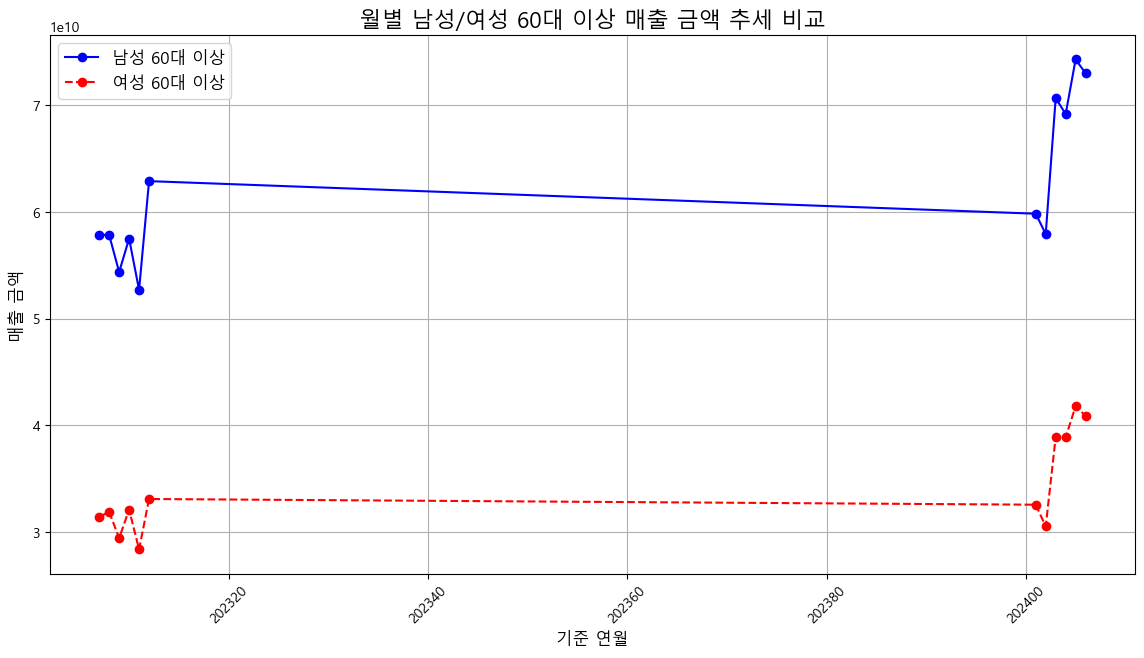

In [16]:
# 월별 남성 60대 이상 매출 금액 합계 계산
monthly_male_sales = realdata_df.groupby('BASE_YM')['MLE_Y60_ANM_SELG_AMNT'].sum()

# 월별 여성 60대 이상 매출 금액 합계 계산
monthly_female_sales = realdata_df.groupby('BASE_YM')['WO_Y60_ANM_SELG_AMNT'].sum()

# 월별 남성/여성 60대 이상 소비 트렌드 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_male_sales.index, monthly_male_sales.values, marker='o', linestyle='-', color='blue', label='남성 60대 이상')
plt.plot(monthly_female_sales.index, monthly_female_sales.values, marker='o', linestyle='--', color='red', label='여성 60대 이상')

plt.title('월별 남성/여성 60대 이상 매출 금액 추세 비교', fontsize=16)
plt.xlabel('기준 연월', fontsize=12)
plt.ylabel('매출 금액', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


#남성과 여성 소비금액 비교

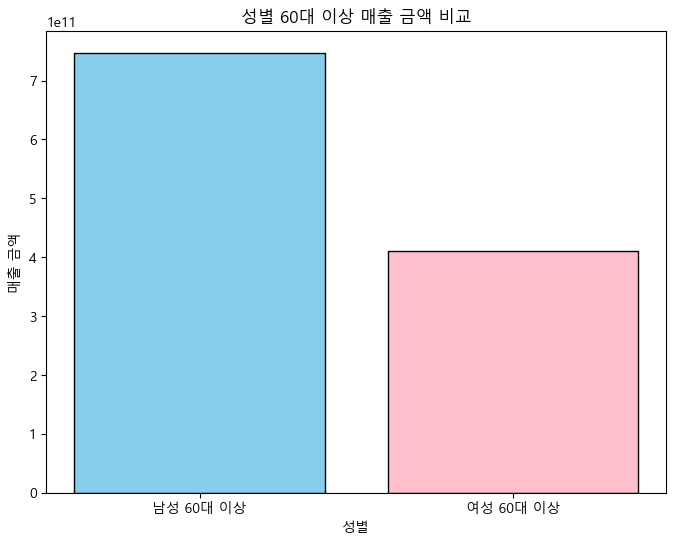

In [17]:
# 성별 매출 금액 합계 계산
gender_sales = realdata_df[['MLE_Y60_ANM_SELG_AMNT', 'WO_Y60_ANM_SELG_AMNT']].sum()

# 막대 그래프 시각화
plt.figure(figsize=(8, 6))
plt.bar(['남성 60대 이상', '여성 60대 이상'], gender_sales, color=['skyblue', 'pink'], edgecolor='black')
plt.title('성별 60대 이상 매출 금액 비교')
plt.xlabel('성별')
plt.ylabel('매출 금액')
plt.show()


#소비패턴분석

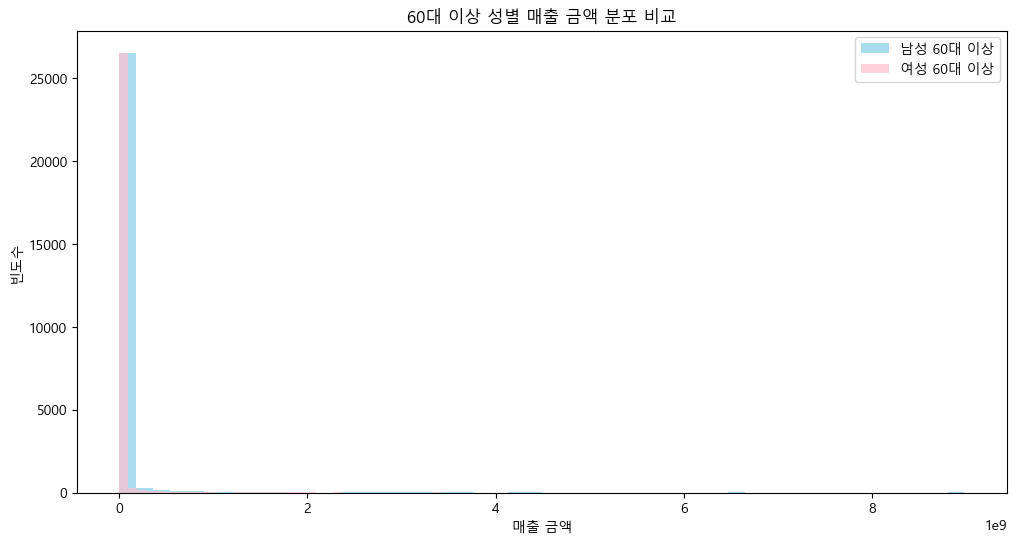

In [19]:
# 연령별 소비 데이터 추출
male_60_sales = realdata_df['MLE_Y60_ANM_SELG_AMNT']
female_60_sales = realdata_df['WO_Y60_ANM_SELG_AMNT']

# 히스토그램 비교
plt.figure(figsize=(12, 6))
plt.hist(male_60_sales, bins=50, alpha=0.7, label='남성 60대 이상', color='skyblue')
plt.hist(female_60_sales, bins=50, alpha=0.7, label='여성 60대 이상', color='pink')
plt.title('60대 이상 성별 매출 금액 분포 비교')
plt.xlabel('매출 금액')
plt.ylabel('빈도수')
plt.legend()
plt.show()


#성별과 소비(금액,이용건수)간 상관관계

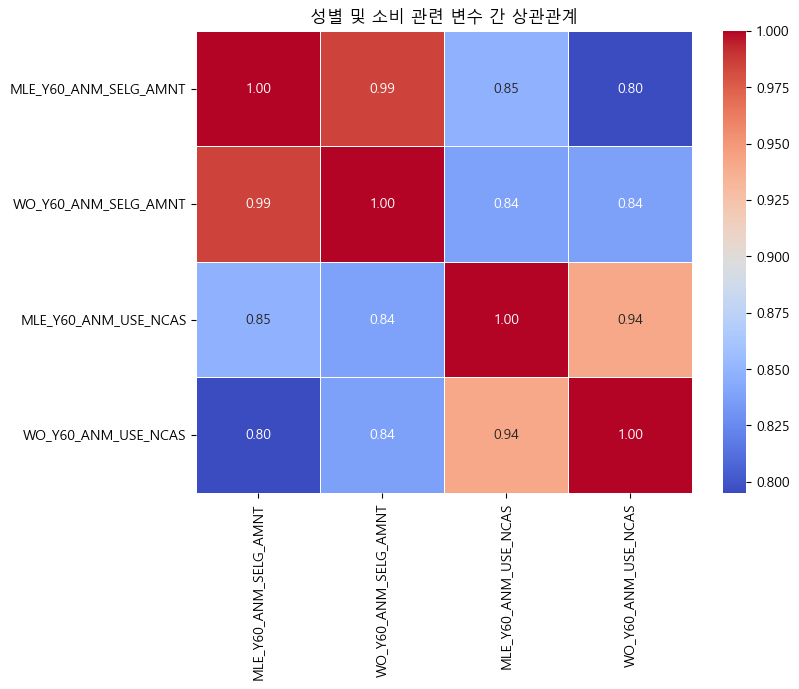

In [20]:
# 상관관계 분석 대상 열 선택
correlation_cols = ['MLE_Y60_ANM_SELG_AMNT', 'WO_Y60_ANM_SELG_AMNT', 'MLE_Y60_ANM_USE_NCAS', 'WO_Y60_ANM_USE_NCAS']
correlation_matrix = realdata_df[correlation_cols].corr()

# 히트맵 시각화
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('성별 및 소비 관련 변수 간 상관관계')
plt.show()


#이용건수 기준으로 고령층의 상위 5 개품목 확인하기

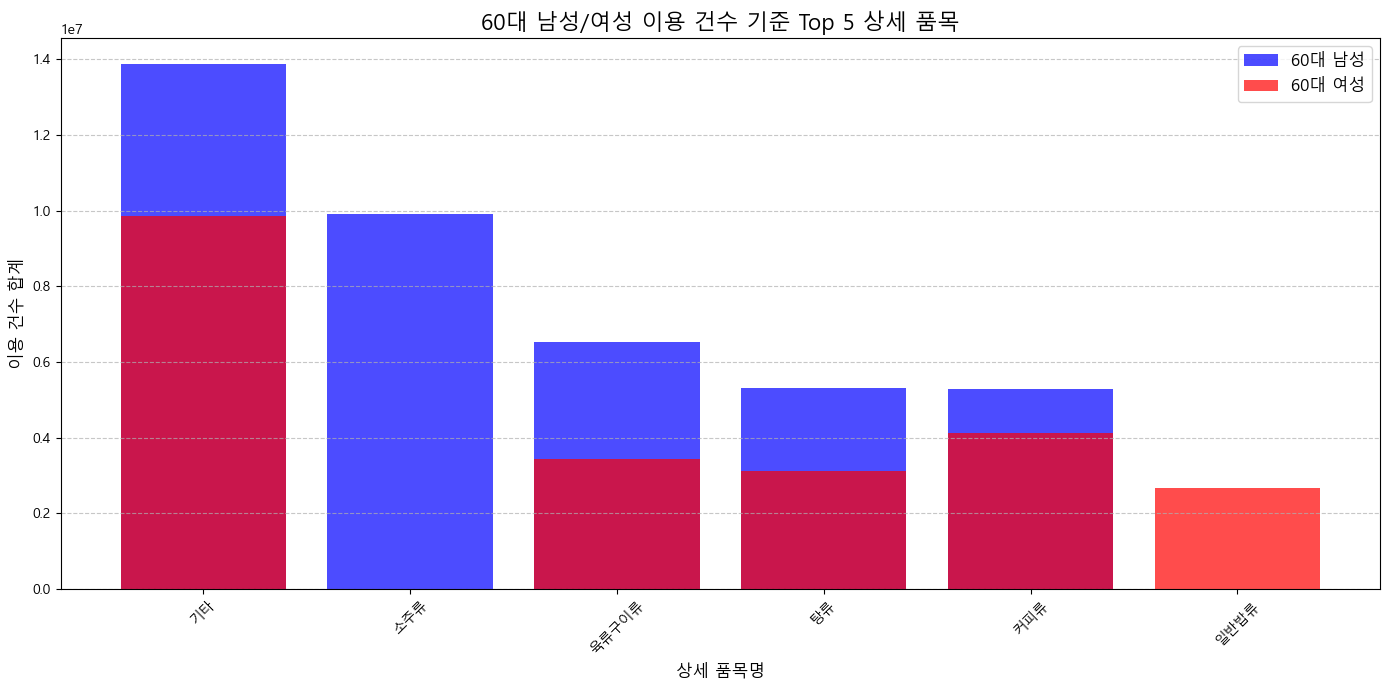

In [21]:
# 60대 남성 이용건수 합계 기준으로 품목별 상위 5개 추출
top5_male_items = (
    realdata_df.groupby('MENU_MDCL_NM')['MLE_Y60_ANM_USE_NCAS']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# 60대 여성 이용건수 합계 기준으로 품목별 상위 5개 추출
top5_female_items = (
    realdata_df.groupby('MENU_MDCL_NM')['WO_Y60_ANM_USE_NCAS']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# 시각화: 60대 남성/여성 이용건수 Top 5 비교
plt.figure(figsize=(14, 7))

# 남성 막대 그래프
plt.bar(top5_male_items.index, top5_male_items.values, alpha=0.7, color='blue', label='60대 남성')

# 여성 막대 그래프
plt.bar(top5_female_items.index, top5_female_items.values, alpha=0.7, color='red', label='60대 여성')

plt.title('60대 남성/여성 이용 건수 기준 Top 5 상세 품목', fontsize=16)
plt.xlabel('상세 품목명', fontsize=12)
plt.ylabel('이용 건수 합계', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#남녀 60대 소비금액과 이용건수 상관관계 히트맵

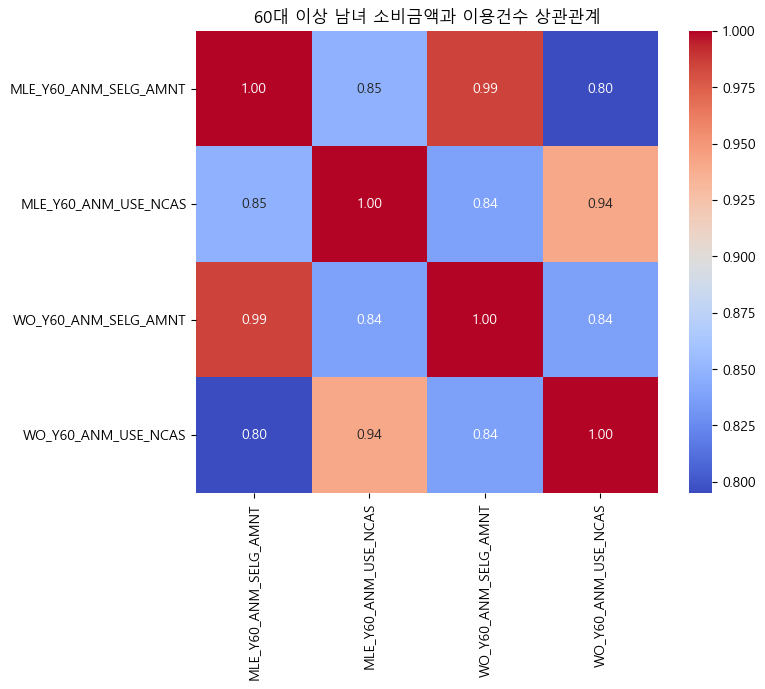

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 60대 이상의 남성과 여성 소비금액, 이용건수 데이터 선택
elderly_data = realdata_df[[
    'MLE_Y60_ANM_SELG_AMNT', 'MLE_Y60_ANM_USE_NCAS',  # 남성
    'WO_Y60_ANM_SELG_AMNT', 'WO_Y60_ANM_USE_NCAS'   # 여성
]]

# 상관계수 계산
correlation_matrix = elderly_data.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)

plt.title('60대 이상 남녀 소비금액과 이용건수 상관관계')
plt.show()
